Problem 1: (a) Used X.shape[1] and X.shape[0]

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml
iris = np.genfromtxt("data/iris.txt",delimiter=None) # load the text file
Y = iris[:,-1] # target value is the last column
X = iris[:,0:-1] # features are the other columns
np.random.seed(0)
print("Number of features:", X.shape[1])
print("Number of data points:", X.shape[0])

Number of features: 4
Number of data points: 148


Problem 1: (b) & (c) Plotted a histograms, computed the mean & standard deviations

Mean: 5.900103764189188
Std: 0.833402066774894


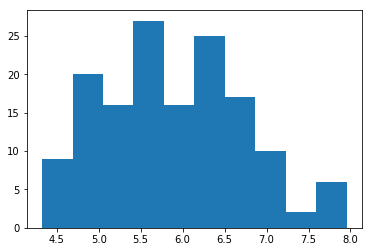

In [2]:
features = []
for i in range(0,X.shape[1]):
    temp = []
    for j in X[:,i]:
        temp.append(j)
    features.append(temp)
plt.hist(features[0])
print("Mean:", np.mean(features[0]))
print("Std:", np.std(features[0]))

Mean: 3.098930916891892
Std: 0.43629183800107685


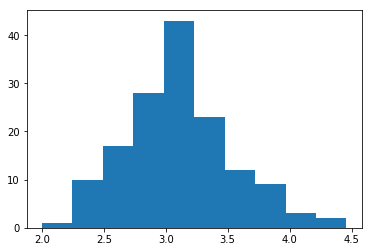

In [3]:
plt.hist(features[1])
print("Mean:", np.mean(features[1]))
print("Std:", np.std(features[1]))

Mean: 3.8195548405405404
Std: 1.7540571093439352


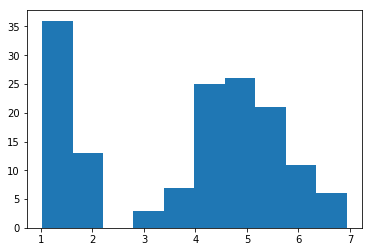

In [4]:
plt.hist(features[2])
print("Mean:", np.mean(features[2]))
print("Std:", np.std(features[2]))

Mean: 1.2525554845945945
Std: 0.7587724570263247


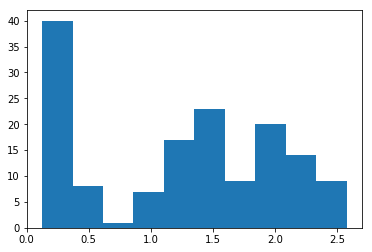

In [5]:
plt.hist(features[3])
print("Mean:", np.mean(features[3]))
print("Std:", np.std(features[3]))

Problem 1: (d)  Plotted a coloured scatterplot

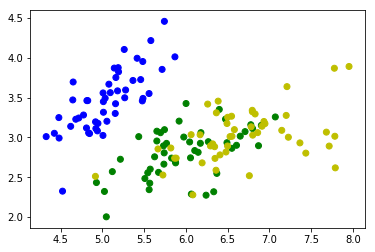

In [6]:
ycolours = []
for i in Y:
    if i==0:
        # plotting y=0 as blue colour
        ycolours.append('b')
    elif i==1:
        # plotting y=1 as green colour
        ycolours.append('g')
    else:
        # plotting y=1 as yellow colour
        ycolours.append('y')
plt.scatter(features[0],features[1], c=ycolours)
plt.show()

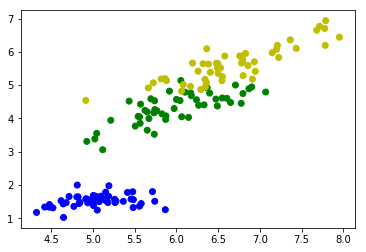

In [7]:
plt.scatter(features[0],features[2], c=ycolours)
plt.show()

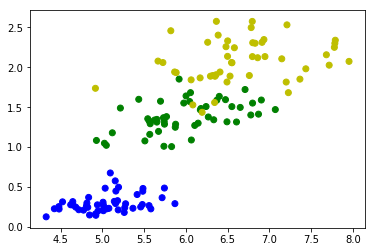

In [8]:
plt.scatter(features[0],features[3], c=ycolours)
plt.show()

Problem 2: (a) Plotted the classification boundary for first 2 features of X and varying values of K

In [9]:
X,Y = ml.shuffleData(X,Y); # shuffle data randomly
Xtr,Xva,Ytr,Yva = ml.splitData(X[:,0:2],Y, 0.75); # split data into 75/25 train/validation

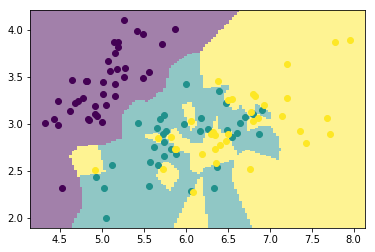

In [10]:
knn = ml.knn.knnClassify() # create the object and train it
knn.train(Xtr, Ytr, 1) # where K is an integer, e.g. 1 for nearest neighbor prediction
YvaHat = knn.predict(Xva) # get estimates of y for each data point in Xva
ml.plotClassify2D(knn, Xtr, Ytr);

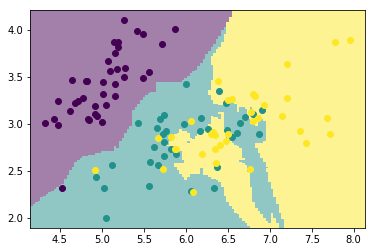

In [11]:
knn = ml.knn.knnClassify() # create the object and train it
knn.train(Xtr, Ytr, 5) # where K is an integer, e.g. 1 for nearest neighbor prediction
YvaHat = knn.predict(Xva) # get estimates of y for each data point in Xva
ml.plotClassify2D(knn, Xtr, Ytr);

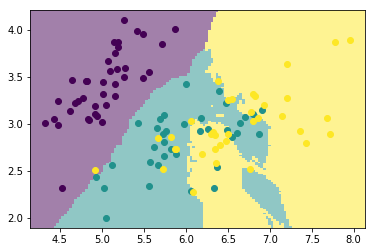

In [12]:
knn = ml.knn.knnClassify() # create the object and train it
knn.train(Xtr, Ytr, 10) # where K is an integer, e.g. 1 for nearest neighbor prediction
YvaHat = knn.predict(Xva) # get estimates of y for each data point in Xva
ml.plotClassify2D(knn, Xtr, Ytr);

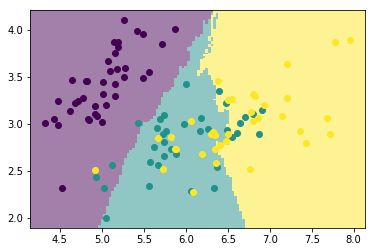

In [13]:
knn = ml.knn.knnClassify() # create the object and train it
knn.train(Xtr, Ytr, 50) # where K is an integer, e.g. 1 for nearest neighbor prediction
YvaHat = knn.predict(Xva) # get estimates of y for each data point in Xva
ml.plotClassify2D(knn, Xtr, Ytr);

Problem 2: (b) Error rate is computed on both the training and validation data as a function of K, for same first 2 features of X

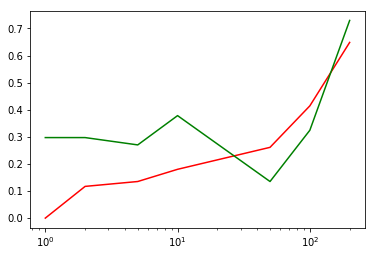

In [14]:
K=[1,2,5,10,50,100,200]
errTrain=[]
errVal=[]
for k in K:
    learner = ml.knn.knnClassify(Xtr, Ytr, k)
    YvaHat = learner.predict(Xva)
    YtrHat = learner.predict(Xtr)
    err=0
    for r1 in range(0,len(YtrHat)):
        if(YtrHat[r1]!=Ytr[r1]):
            err=err+1
    errTrain.append(err/len(Ytr))
    err=0
    for r2 in range(0,len(YvaHat)):
         if(YvaHat[r2]!=Yva[r2]):
                err=err+1
    errVal.append(err/len(Yva))
plt.semilogx(K,errTrain,'r-',K,errVal,'g-')

Problem 2: (b) I would recommend the value K = 50 because that is when the validation error is minimum.